## TSF - GRIP - Data Science and Business Analytics Internship

### Name : Rajpurohit Bhavesh

## **Simple Linear Regression**
### Aim: Predict the percentage of an student based on the no. of study hours.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

###  Reading data from remote link

In [9]:

url = "http://bit.ly/w-data"
st_data = pd.read_csv(url)
print("Dataset is imported successfully")
student_data.head(7)

Dataset is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [14]:
st_data.shape

(25, 2)

In [10]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
st_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Understanding the relation by plotting the graph

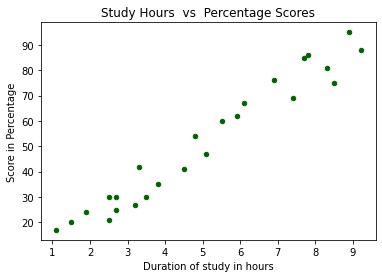

In [26]:

st_data.plot.scatter(x='Hours', y='Scores',color='DarkGreen') 
plt.title('Study Hours  vs  Percentage Scores')
plt.xlabel('Duration of study in hours')
plt.ylabel('Score in Percentage')
plt.show()


### Processing the data for training and testing

In [35]:
X = st_data.iloc[:,0:1].values  
y = st_data.iloc[:,1].values  
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [39]:
X , y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

### Splitting the data into training and testing values

In [40]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Linear regression model

In [41]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 
print("The coefficient for the model is ",model.coef_[0])
print("The intercept for the model is ",model.intercept_)

The coefficient for the model is  9.910656480642237
The intercept for the model is  2.018160041434683


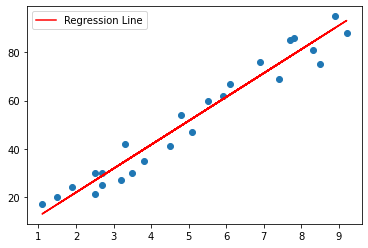

In [43]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

### Making Predictions

In [45]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [46]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
#Estimating training and test score
print("Training Score:",model.score(X_train,y_train))
print("Test Score:",model.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


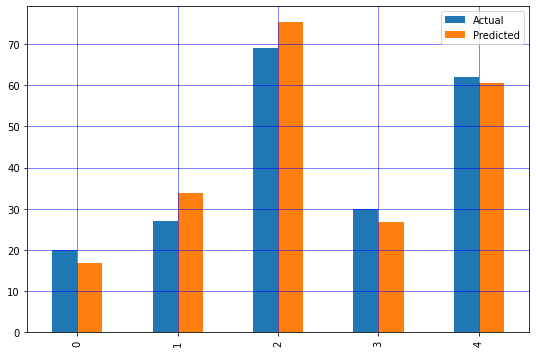

In [55]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(9,6))
plt.grid(which='major', linewidth='0.5', color='blue')
plt.grid(which='minor', linewidth='0.5', color='red')
plt.show()

### Predicting the percentage of a student who studies for 9.25 hours

In [50]:
#Question: What will be predicted score if a student studies for 9.25 hrs/ day?
#Ans:

hours = 9.25
pred = model.predict(np.array(hours).reshape(-1,1))
print("Predicted score of student if he studies 9.25 hrs/day = {}".format(pred[0]))

Predicted score of student if he studies 9.25 hrs/day = 93.69173248737538


## Model Evaluation

In [48]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
